# Data Exploration Exercises

-----

# Exercise 1

- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function [`pd.to_datetime()`](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

# Solution 1

In [54]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from scipy.io import wavfile
from IPython.display import Audio

In [5]:
df = pd.read_csv('../data/international-airline-passengers.csv')

df.head()

,Month,Thousand Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null object
Thousand Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format = True)

df.head()

,Month,Thousand Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                  144 non-null datetime64[ns]
Thousand Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df = df.set_index(df["Month"])

df.head()

,Month,Thousand Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [10]:
df = df.drop(columns = ["Month"])

df.head()

,Thousand Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


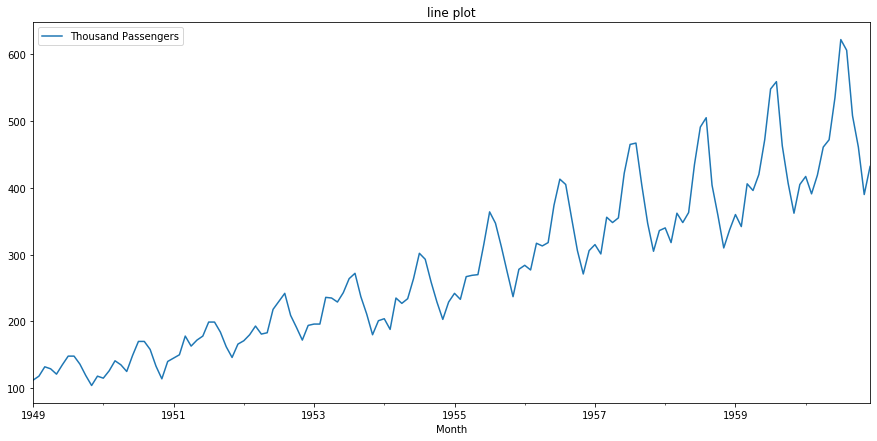

In [11]:
df.plot(title = 'line plot', figsize = (15, 7))

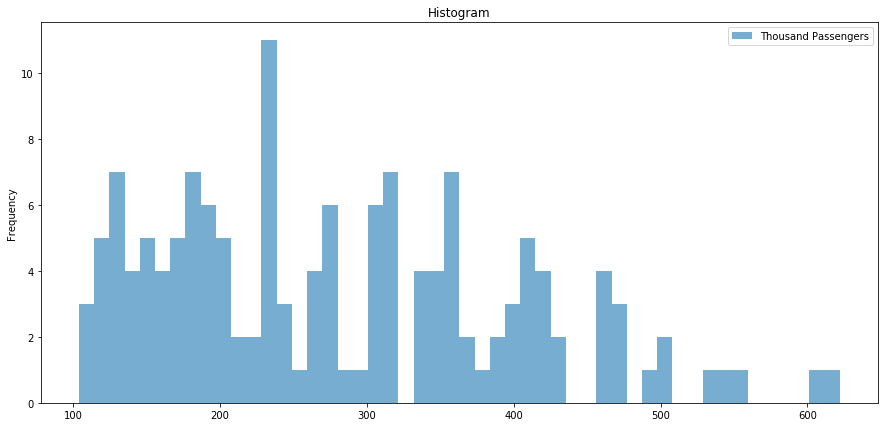

In [12]:
df.plot(kind    = 'hist', # histogram
        bins    = 50, # number of bins
        title   = 'Histogram', # title of the plot
        alpha   = 0.6, # control transparency
        figsize = (15, 7)
        )

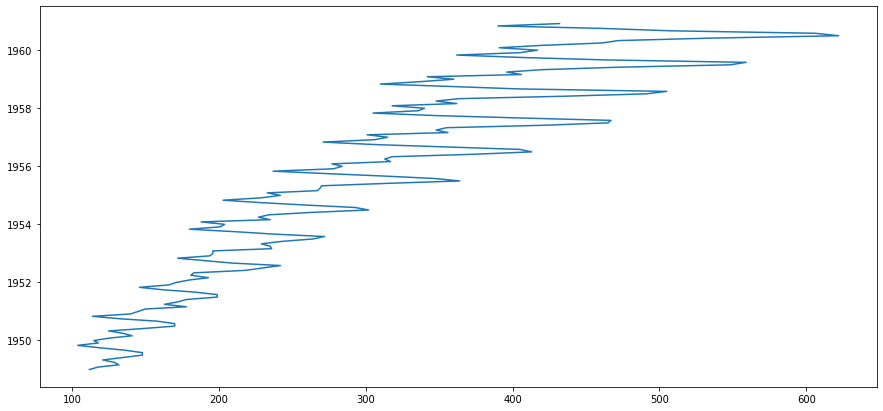

In [13]:
plt.figure(figsize = (15, 7))

plt.plot(df["Thousand Passengers"], df.index)

plt.xlabel = 'Months'

plt.ylabel = 'Passenger number'

-------

# Exercise 2

- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

# Solution 2

In [14]:
df = pd.read_csv('../data/weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


In [17]:
df.groupby("Gender").count()

,Height,Weight
Gender,,
Female,5000,5000
Male,5000,5000


In [18]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [19]:
df.shape

(10000, 3)

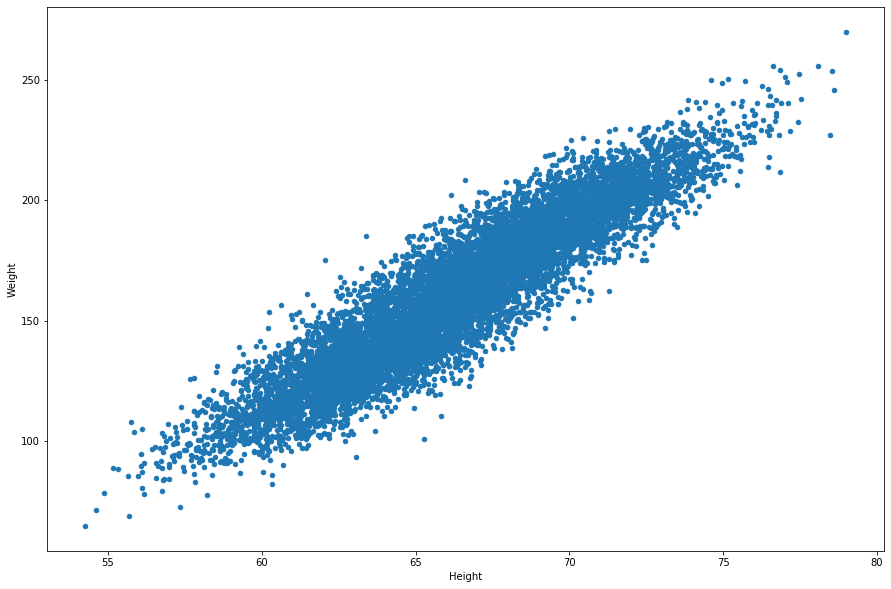

In [20]:
_ = df.plot(kind = 'scatter', x = 'Height', y = 'Weight', figsize = (15, 10))

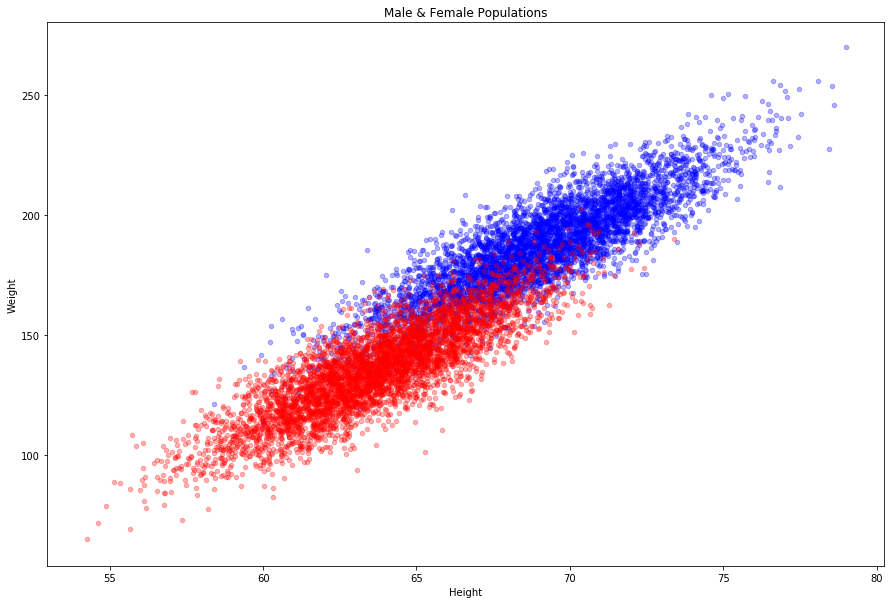

In [21]:
males = df[df.Gender == 'Male']

females = df[df.Gender == 'Female']

fig, ax = plt.subplots()

males.plot(kind = 'scatter', x = 'Height', y = 'Weight',
           ax = ax, color = 'blue', alpha = 0.3,
           )

females.plot(kind = 'scatter', x = 'Height', y = 'Weight',
            ax = ax, color = 'red', alpha = 0.3,
            title = 'Male & Female Populations', figsize = (15, 10), legend = True)

In [22]:
df['Gendercolor'] = df['Gender'].map({'Male': 'blue', 'Female': 'red'})

df.head()

,Gender,Height,Weight,Gendercolor
0,Male,73.847017,241.893563,blue
1,Male,68.781904,162.310473,blue
2,Male,74.110105,212.740856,blue
3,Male,71.730978,220.042470,blue
4,Male,69.881796,206.349801,blue


In [23]:
df.shape

(10000, 4)

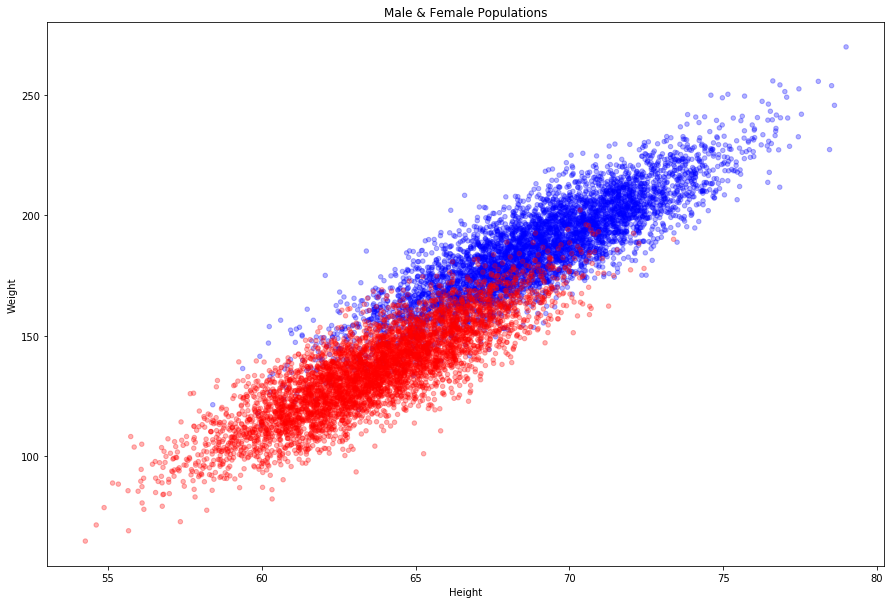

In [24]:
df.plot(kind  = 'scatter', 
        x     = 'Height',
        y     = 'Weight',
        c     = df['Gendercolor'],
        alpha = 0.3,
        title = 'Male & Female Populations',
        figsize = (15, 10)
       )

-------

# Exercise 3

- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

# Solution 3

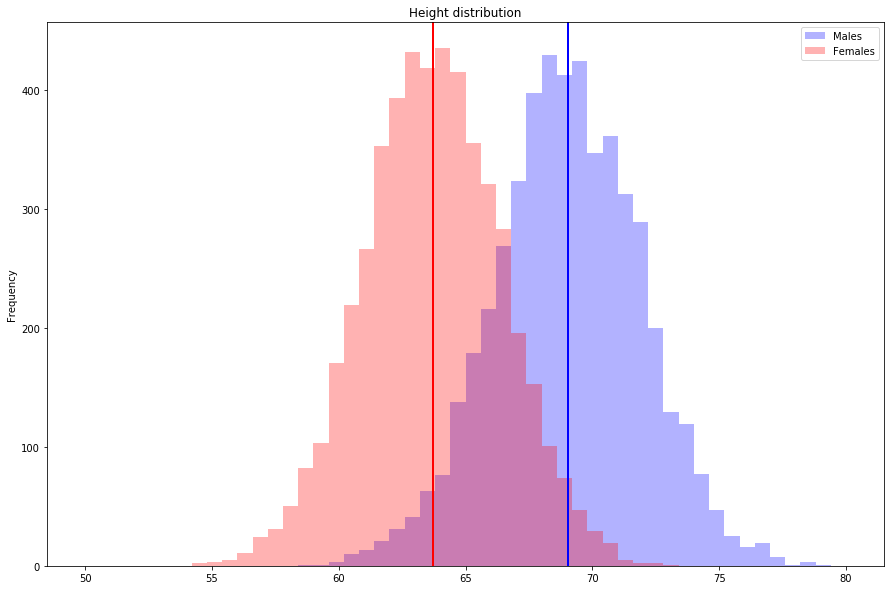

In [67]:
males['Height'].plot(kind      = 'hist',
                     bins      = 50,
                     range     = (50, 80),
                     alpha     = 0.3,
                     color     = 'blue',
                     figsize   = (15, 10))

females['Height'].plot(kind    = 'hist',
                       bins    = 50,
                       range   = (50, 80),
                       alpha   = 0.3,
                       color   = 'red',
                       figsize = (15, 10))

plt.title('Height distribution')

plt.legend(["Males", "Females"])

plt.axvline(males['Height'].mean(), color = 'blue', linewidth = 2)

plt.axvline(females['Height'].mean(), color = 'red', linewidth = 2)

C:\Users\Sefa3\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


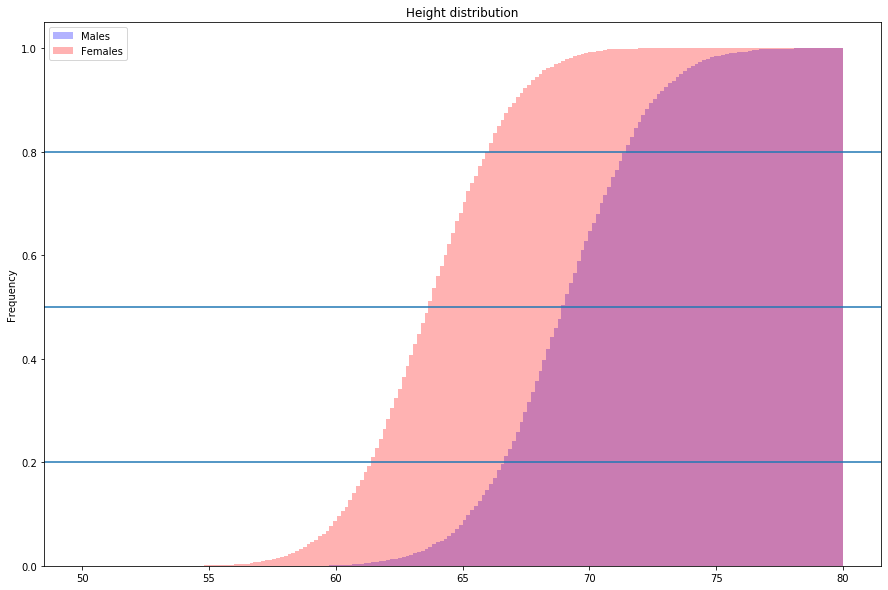

In [74]:
males['Height'].plot(kind             = 'hist',
                     bins             = 200,
                     range            = (50, 80),
                     alpha            = 0.3,
                     color            = 'blue',
                     figsize          = (15, 10),
                     cumulative       = True,
                     normed           = True)

females['Height'].plot(kind           = 'hist',
                       bins           = 200,
                       range          = (50, 80),
                       alpha          = 0.3,
                       color          = 'red',
                       figsize        = (15, 10),
                       cumulative     = True,
                       normed         = True)

plt.title('Height distribution')

plt.legend(["Males", "Females"])

plt.axhline(0.8)

plt.axhline(0.5)

plt.axhline(0.2)

--------

# Exercise 4

- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

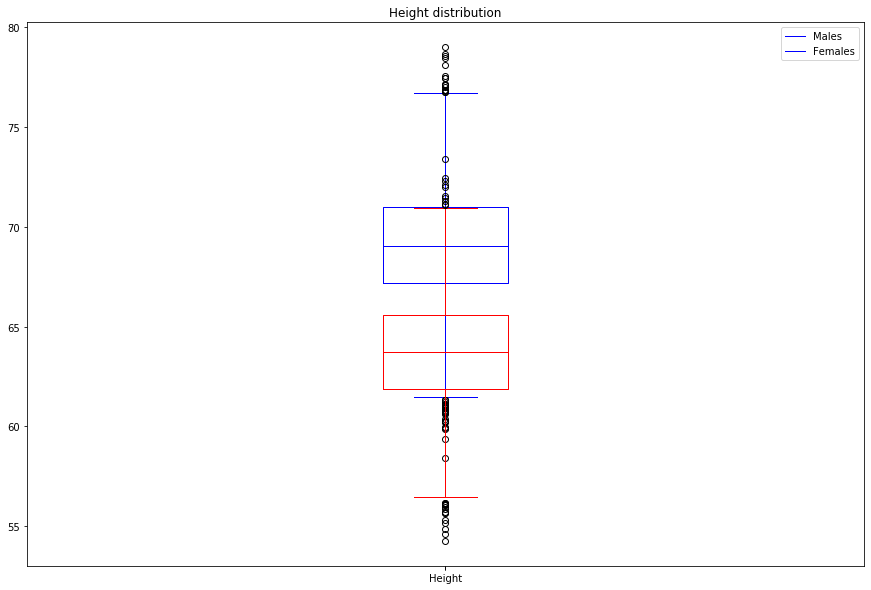

In [77]:
males['Height'].plot(kind             = 'box',
                     color            = 'blue',
                     figsize          = (15, 10)
                    )

females['Height'].plot(kind           = 'box',
                       color          = 'red',
                       figsize        = (15, 10)
                      )

plt.title('Height distribution')

plt.legend(["Males", "Females"])

----------

# Exercise 5

- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

# Solution 5

In [80]:
df = pd.read_csv('titanic-train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [83]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3986B5F28>,
      dtype=object)

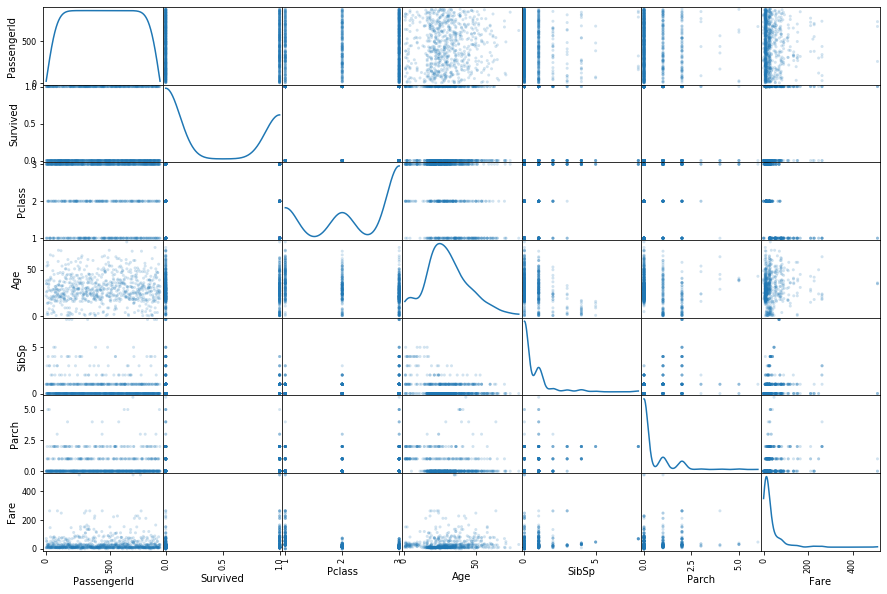

In [85]:
scatter_matrix(df, alpha=0.2, figsize=(15, 10), diagonal='kde')

In [86]:
df1 = df.copy()

df1.drop('PassengerId', axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C39B34CE10>,
      dtype=object)

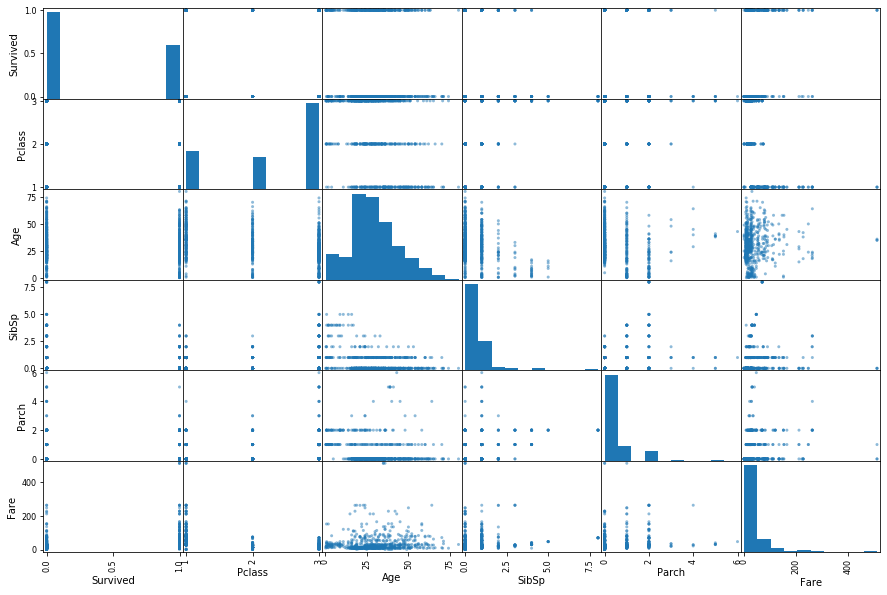

In [88]:
scatter_matrix(df1, figsize=(15, 10))

-----------